##### 1. Построить гистограммы (5 баллов)
В файлике https://github.com/Serfentum/bf_course/blob/master/14.pandas/train.csv содержится информация о числе ридов с каждым из 4-ёх нуклеотидов по разным позициям (колонки A, T, G, C)). Постройте гистограмму распределения этих чисел

##### 2. Отбор необходимых данных (5 баллов)
Сохраните в файл train_part.csv следующую часть из файла train.csv (из предыдущего задания):
Строки, где matches больше чем среднее
Колонки pos, reads_all, mismatches, deletions, insertions

##### 3. Сделать небольшой EDA (15 баллов)
Проведите Explorative Data Analysis какого-нибудь датасета (прошу, только не Титаник). Нужны корреляции, графики распределений

##### 4. Работа с реальными данными (25 дополнительных баллов)
В биоинформатике часто приходтся работать с табличными данными (gff, bed, vcf и т.д.), однако в терминале делать различные продвинутые операции довольно трудно, тут нам и приходит на помощь пандас.
В прикреплённых файлах лежит аннотация рибосомальной РНК некоторого метагеномного датасета в формате GFF (rrna_annotation.gff), а также файл с выравниванием метагеномной сборки на этот же датасет в формате BED 6 (alignment.bed).
Напишите функции read_gff и read_bed6 для чтения соответствующих форматов. Они должны возвращать датафреймы как в примере (картинка Example1), но имена колонок можно сделать любыми.
Колонка с атрибутами несёт слишком много избыточной информации и ей не удобно пользоваться, оставьте в ней только данные о типе рРНК одной короткой строкой (16S, 23S, 5S).
Сделайте таблицу, где для каждой хромосомы (на самом деле это не хромосомы, а референсные геномы) показано количество рРНК каждого типа. Можно построить barplot, отображающий эти данные
Далее самое интересное. Мы хотим узнать сколько рРНК в процессе сборки успешно собралось. Для этого можно воспользоваться программой bedtools intersect и пересечь эти два файла. В результате сохранятся только записи об рРНК, интервал которой перекрывался с интервалом контига в выравнивании, это означает, что это ген есть в сборке. Но забудьте про bedtools! У нас тут вообще-то пандас! Поэтому давайте получим такой же результат в нём. Выведите таблицу, содержащую исходные записи об рРНК полностью вошедших в сборку (не фрагментом), а также запись о контиге в который эта РНК попала. Итоговая таблица должна выглядеть примерно так (Example2). Обратите внимание, что в один контиг может попасть несколько рРНК.
Если вы затрудняетесь понять, какую функцию стоит использовать в той или иной ситуации - пишите в ЛС или чат)

##### Общие требования:
Не используйте циклы при работе с пандасом без необходимости. Скорее всего найдётся функция, которая сделает всё, что вам нужно
Форма сдачи - ссылка на пулл реквест в master/main ветку вашего репозитория BI_2021_Python.
Для этого ДЗ залейте на гитхаб Jupyter Notebook со всеми заданиями, для удобства проверки и фидбека пробублируйте ноутбук скриптом того же содержания.
Наличие README с описанием и инструкцией по использованию поощрается.
Использовать сторонние библиотеки можно, указывайте их все в requirements.txt. Только не стоит использовать готовые решения (либы для работы с BED файлами) для задания 4.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Задание 1. Гистограмма

In [2]:
data = pd.read_csv(r'train.csv')

In [4]:
data

,pos,reads_all,matches,mismatches,deletions,insertions,A,C,T,G,A_fraction,T_fraction,G_fraction,C_fraction
0,279,8045,32,7972,46,8,7911.0,54.0,11.0,NaN,0.983503,0.000815,NaN,0.006896
1,280,8045,7995,48,19,9,NaN,16.0,13.0,19.0,NaN,0.001355,0.002392,0.001914
2,281,8045,7983,50,16,5,NaN,24.0,4.0,24.0,NaN,0.000639,0.002875,0.002310
3,282,8049,7510,505,33,65,105.0,11.0,395.0,NaN,0.012750,0.049096,NaN,0.000919
4,283,8042,7786,155,115,62,46.0,NaN,93.0,31.0,0.004960,0.010992,0.003186,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,337,8056,7542,471,58,7,NaN,63.0,47.0,367.0,NaN,0.004584,0.045444,0.007767
59,338,8061,7967,62,29,5,17.0,NaN,26.0,33.0,0.001060,0.002207,0.003992,NaN
60,339,8062,8002,48,14,3,14.0,14.0,33.0,NaN,0.001076,0.002953,NaN,0.001322
61,340,8061,7918,146,16,4,NaN,75.0,43.0,33.0,NaN,0.005307,0.002951,0.008808


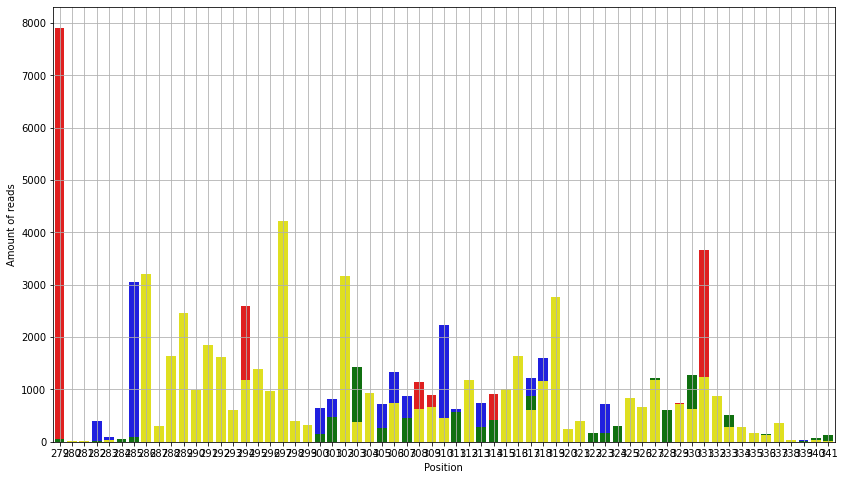

In [5]:
fig_dims = (14, 8)
fig, axes = plt.subplots(figsize=fig_dims)
sns.barplot(x=data['pos'], y=data['A'], color='red')
sns.barplot(x=data['pos'], y=data['T'], color='blue')
sns.barplot(x=data['pos'], y=data['C'], color='green')
sns.barplot(x=data['pos'], y=data['G'], color='yellow')
axes.set(xlabel='Position', ylabel='Amount of reads')
plt.grid()

### Выглядит не очень

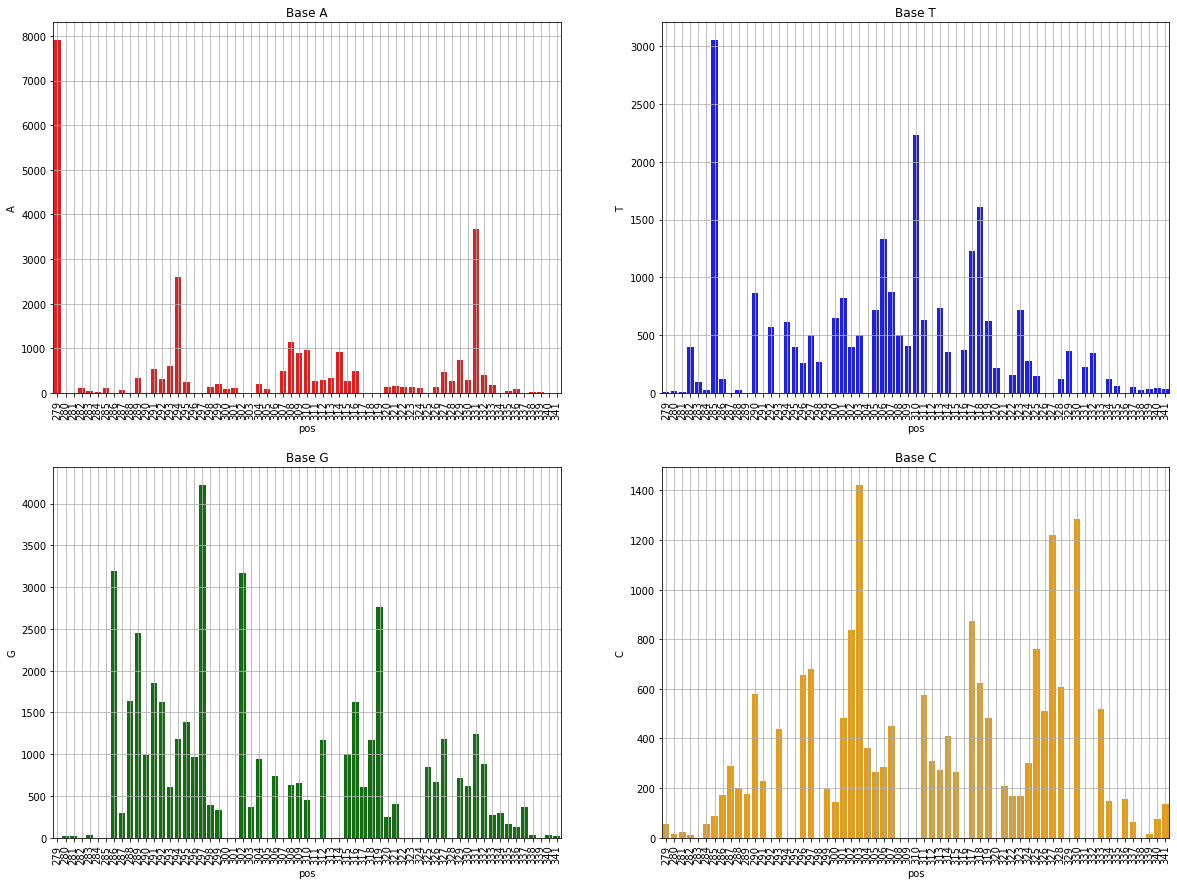

In [6]:
alphabet = ['A', 'T', 'G', 'C']
colors = ['red', 'blue', 'green', 'orange']
fig_dims = (20, 15)
fig, axes = plt.subplots(figsize=fig_dims)
for i in range(len(alphabet)):
    plt.subplot(2, 2, i+1)
    sns.barplot(x=data['pos'], y=data[alphabet[i]], color=colors[i])
    plt.title("Base " + alphabet[i])
    plt.xticks(rotation=90)
    plt.grid()

### Так по-лучше будет

### Задание 2. Отбор необходимых данных (5 баллов)
Сохраните в файл train_part.csv следующую часть из файла train.csv (из предыдущего задания):
Строки, где matches больше чем среднее
Колонки pos, reads_all, mismatches, deletions, insertions

In [7]:
data.loc[data.matches > data.matches.mean(), ["pos", "reads_all", "mismatches", "deletions", "insertions"]]

,pos,reads_all,mismatches,deletions,insertions
1,280,8045,48,19,9
2,281,8045,50,16,5
3,282,8049,505,33,65
4,283,8042,155,115,62
5,284,8048,104,864,241
17,296,8039,1883,1308,50
19,298,8047,769,1345,12
20,299,8043,728,1053,60
21,300,8049,862,468,64
22,301,8050,1395,516,51


In [8]:
data.loc[data.matches > data.matches.mean(), ["pos", "reads_all", "mismatches", "deletions", "insertions"]].to_csv('train_part.csv') 

### Задание 3. Сделать небольшой EDA (15 баллов)
Проведите Explorative Data Analysis какого-нибудь датасета (прошу, только не Титаник). Нужны корреляции, графики распределений

In [9]:
table = pd.read_excel(r'imm.xlsx')

#### Описание датасета.
Эти данные были получены при анализе внутриклеточных метаболитов культуры T-лимфоцитов человека в динамике после активации.
Я немного переработал оригинальные данные, т.к. это был exel с несколькими страницами, а R и Pandas, как оказалось, не особо дружат с таким форматом. Данные были преобразованы относительно начала культивации (0hr) и представленнны в виде логарифма дельты концентрации. 

In [10]:
table

,BIOCHEMICAL,SUPER_PATHWAY,SUB_PATHWAY,KEGG_ID,0Hr,6hr,20hr,30hr
0,asparagine,Amino acid,Alanine and aspartate metabolism,C00152,0,-0.815784,0.763967,1.045431
1,aspartate,Amino acid,Alanine and aspartate metabolism,C00049,0,0.680486,0.292907,0.474244
2,beta-alanine,Amino acid,Alanine and aspartate metabolism,C00099,0,0.000000,3.459432,4.112384
3,N-carbamoylaspartate,Amino acid,Alanine and aspartate metabolism,C00438,0,0.000000,3.459432,4.806721
4,creatine,Amino acid,Creatine metabolism,C00300,0,0.268416,0.723937,1.367956
...,...,...,...,...,...,...,...,...
120,glycylproline,Peptide,Dipeptide,NaN,0,-3.459432,1.368871,0.527406
121,gamma-glutamylglutamine,Peptide,g-glutamyl,NaN,0,-0.873917,1.974726,2.201680
122,3-methyluridine,NaN,NaN,NaN,0,-3.459432,1.183164,1.926826
123,adenosine 3'-monophosphate,NaN,NaN,C01367,0,-0.289224,0.272298,0.397339


In [11]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BIOCHEMICAL    125 non-null    object 
 1   SUPER_PATHWAY  122 non-null    object 
 2   SUB_PATHWAY    122 non-null    object 
 3   KEGG_ID        106 non-null    object 
 4   0Hr            125 non-null    int64  
 5   6hr            125 non-null    float64
 6   20hr           125 non-null    float64
 7   30hr           125 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 7.9+ KB


##### У нас в датасете 4 количественных переменных и 4 категориальных

In [12]:
table.describe()

,0Hr,6hr,20hr,30hr
count,125.0,125.000000,125.000000,125.000000
mean,0.0,-0.436787,1.450396,2.032661
std,0.0,1.066157,1.407731,1.733529
min,0.0,-3.637255,-3.959227,-3.557739
25%,0.0,-0.633399,0.685662,1.085425
50%,0.0,-0.046847,1.366773,1.926826
75%,0.0,0.133079,2.073029,3.336820
max,0.0,0.869385,4.996420,5.802142


##### Пропущенных значений нет, данные соответствуют описанию (они были рассчитаны относительно концентраций в 0hr и прологорифмированны).

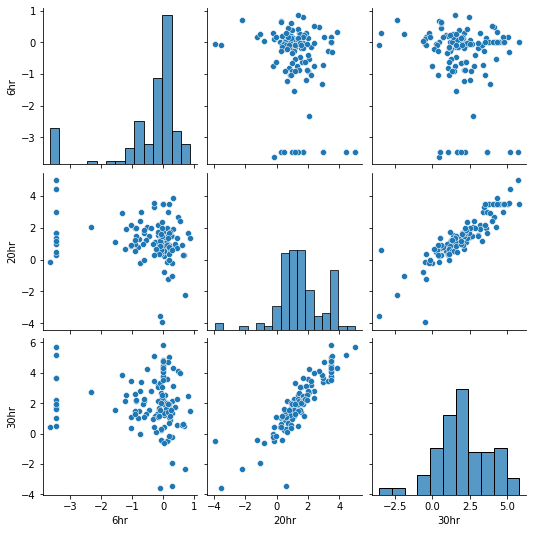

In [12]:
sns.pairplot(table[['6hr', '20hr', '30hr']])

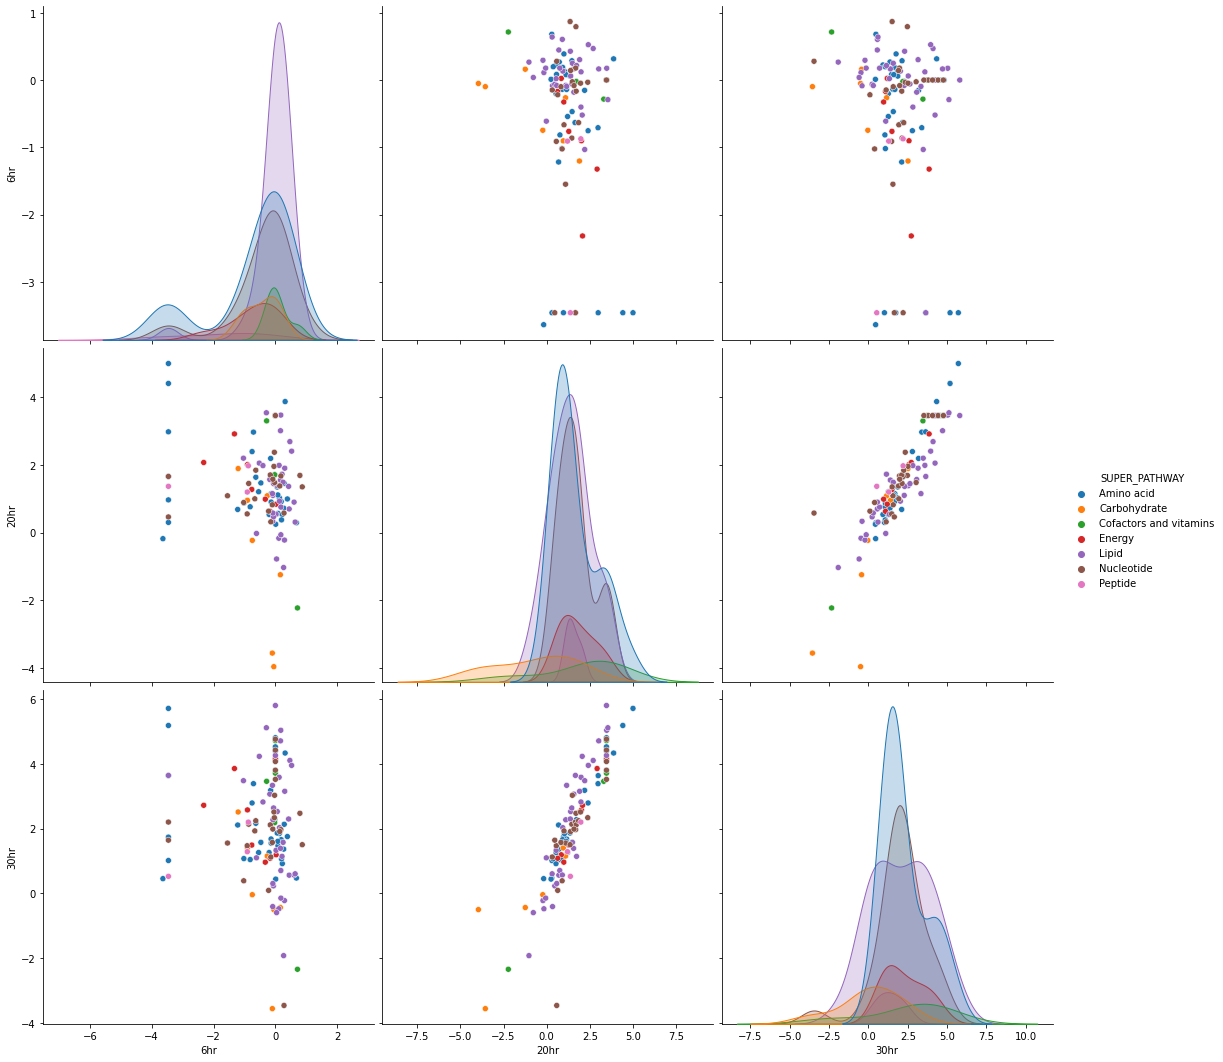

In [13]:
sns.pairplot(table.loc[:, table.columns != '0Hr'], hue='SUPER_PATHWAY', height=5)

Так как это EDA, надо прокомментировать рисунки.

На графиках четко видна динамика метаболитов при активации. Изменение гистограмм распределения метаболитов показывает, что меняется состав клеток (например увеличивается концентрация аминокислот в клетке). Обращает внимание наличие достаточно выраженной линейной взаимосвязи между концентрацией метаболитов в 20 и 30 часов после активации и практически полное отсутствие взаимосвязи в 6 часов активации с другими временными промежутками. Это, вероятно, начальная стадия активации, когда происходит индукция экспрессии целевых генов и поздняя стадия, когда работают уже механизмы накопления (клетки входят в G1 период). 

##### Для распределений скомбинируем данные, например, посмотрим на распределение аминокислот в различные промежутки времени.

<AxesSubplot:>

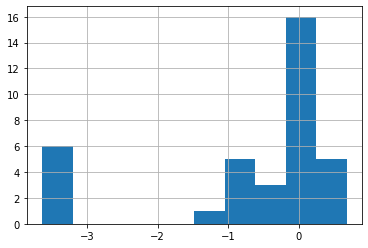

In [32]:
table.query('SUPER_PATHWAY == "Amino acid"').iloc[:,5].hist()

<AxesSubplot:>

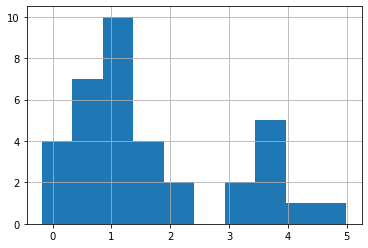

In [27]:
table.query('SUPER_PATHWAY == "Amino acid"').iloc[:,6].hist()

<AxesSubplot:>

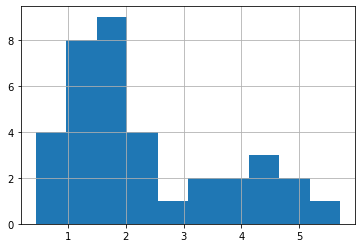

In [28]:
table.query('SUPER_PATHWAY == "Amino acid"').iloc[:,7].hist()

##### Та же картина, что и на парных графиках

#### Агрегируем наши данные и посмотрим на среднюю динамику основных классов метаболитов

In [33]:
common_pathway = table.iloc[:,[1, 4, 5, 6, 7]].groupby('SUPER_PATHWAY').mean()
common_pathway

,0Hr,6hr,20hr,30hr
SUPER_PATHWAY,,,,
Amino acid,0.0,-0.689858,1.647274,2.275088
Carbohydrate,0.0,-0.443790,-0.721378,0.076686
Cofactors and vitamins,0.0,0.081559,1.941374,2.347084
Energy,0.0,-0.722344,1.774725,2.256624
Lipid,0.0,-0.031707,1.348021,2.103654
Nucleotide,0.0,-0.427804,1.684903,2.051552
Peptide,0.0,-1.747094,1.514490,1.338798


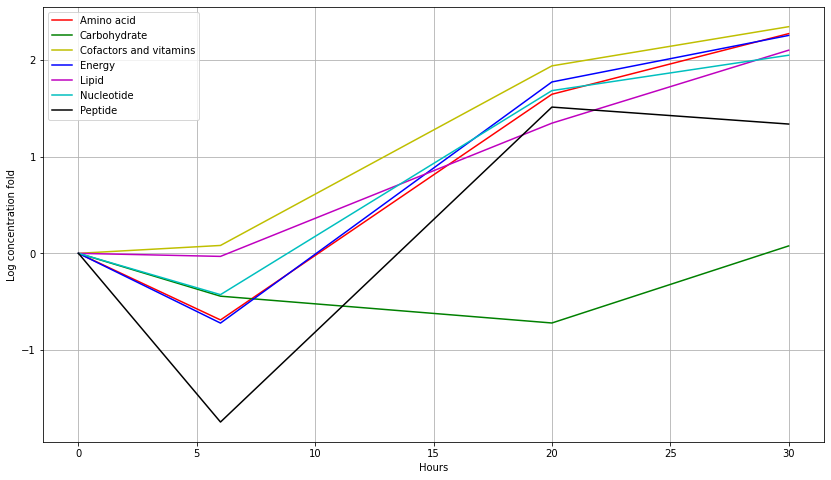

In [34]:
vector = [0, 6, 20, 30]
fig_dims = (14, 8)
fig, axes = plt.subplots(figsize=fig_dims)
axes.plot(vector, common_pathway.iloc[0], color="r")
axes.plot(vector, common_pathway.iloc[1], color="g")
axes.plot(vector, common_pathway.iloc[2], color="y")
axes.plot(vector, common_pathway.iloc[3], color="b")
axes.plot(vector, common_pathway.iloc[4], color="m")
axes.plot(vector, common_pathway.iloc[5], color="c")
axes.plot(vector, common_pathway.iloc[6], color="k")
axes.set(xlabel='Hours', ylabel='Log concentration fold')
plt.legend(common_pathway.index)
plt.grid()

##### Как видно из схемы, все классы демонстрируют общий паттерн поведения: снижение в первые часы с последующим увеличением. Это можно объяснить тем, что при активации метаболизма, активация транспортных систем запаздывает, что снижает концентрацию метаболитов в клетках; по истечению времени, концентрация достаточно быстро возрастает, что объясняется активацией (экспрессией) транспортных систем белков-переносчиков.

### Задание 4. Работа с реальными данными (25 дополнительных баллов)
В биоинформатике часто приходтся работать с табличными данными (gff, bed, vcf и т.д.), однако в терминале делать различные продвинутые операции довольно трудно, тут нам и приходит на помощь пандас.
В прикреплённых файлах лежит аннотация рибосомальной РНК некоторого метагеномного датасета в формате GFF (rrna_annotation.gff), а также файл с выравниванием метагеномной сборки на этот же датасет в формате BED 6 (alignment.bed).
Напишите функции read_gff и read_bed6 для чтения соответствующих форматов. Они должны возвращать датафреймы как в примере (картинка Example1), но имена колонок можно сделать любыми.
Колонка с атрибутами несёт слишком много избыточной информации и ей не удобно пользоваться, оставьте в ней только данные о типе рРНК одной короткой строкой (16S, 23S, 5S).
Сделайте таблицу, где для каждой хромосомы (на самом деле это не хромосомы, а референсные геномы) показано количество рРНК каждого типа. Можно построить barplot, отображающий эти данные
Далее самое интересное. Мы хотим узнать сколько рРНК в процессе сборки успешно собралось. Для этого можно воспользоваться программой bedtools intersect и пересечь эти два файла. В результате сохранятся только записи об рРНК, интервал которой перекрывался с интервалом контига в выравнивании, это означает, что это ген есть в сборке. Но забудьте про bedtools! У нас тут вообще-то пандас! Поэтому давайте получим такой же результат в нём. Выведите таблицу, содержащую исходные записи об рРНК полностью вошедших в сборку (не фрагментом), а также запись о контиге в который эта РНК попала. Итоговая таблица должна выглядеть примерно так (Example2). Обратите внимание, что в один контиг может попасть несколько рРНК.
Если вы затрудняетесь понять, какую функцию стоит использовать в той или иной ситуации - пишите в ЛС или чат)

In [30]:
def read_gff(path):
    counter = 0
    with open('rrna_annotation.gff') as file:
        for line in file:
            if line[0] == '#':
                counter += 1
                continue
            else:
                break
    cols = ["chromosome", "source", "type", "start", "end", "score", "strand", "phase", "atributes"]
    gff = pd.read_csv(path, sep = '\t', names = cols, skiprows = counter)
    return gff

In [31]:
def read_bed6(path):
    counter = 0
    with open('rrna_annotation.gff') as file:
        for line in file:
            if line[0] == '#':
                counter += 1
                continue
            else:
                break
    cols = ["chromosome", "start", "end", "name", "score", "strand"]
    bed = pd.read_csv(path, sep = '\t', names = cols, skiprows = counter)
    return bed

In [32]:
gff = read_gff(r'rrna_annotation.gff')
gff

,chromosome,source,type,start,end,score,strand,phase,atributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [33]:
bed = read_bed6('alignment.bed')
bed

,chromosome,start,end,name,score,strand
0,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
1,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
2,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
3,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
4,Reference_1,1763926,1764363,NODE_5666_length_436_cov_418.653543,0,-
...,...,...,...,...,...,...
7704,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7705,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7706,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7707,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+
